# Train a linear model for sentiment classification


# Development environment


In [1]:
# install packages
! pip install scikit-learn
! pip install datasets
! pip install wandb
! pip install seaborn 

In [5]:
import pandas as pd
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
import wandb
import time

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Login to Weights and Biases


In [6]:
wandb.login()


True

In [8]:
datetime = time.strftime("%Y%m%d-%H%M%S")
wandb.init(
      # Set the project where this run will be logged
      project="sutd-mlops-project", 
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"experiment_session2_run_{datetime}", 
      # Track hyperparameters and run metadata
      config={
      "learning_rate": 0.01,
      "loss": "log_loss",
      "penalty": "l2",
      "architecture": "SGDClassifier",
      "dataset_name": "rotten_tomatoes",
      })
config = wandb.config

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7ff298a51e40>> (for pre_run_cell), with arguments args (<ExecutionInfo object at 7ff297ded150, raw_cell="datetime = time.strftime("%Y%m%d-%H%M%S")
wandb.in.." store_history=True silent=False shell_futures=True cell_id=74339f73-9f92-455c-b1bd-ce5fb9fadeed>,),kwargs {}:


TypeError: _WandbInit._resume_backend() takes 1 positional argument but 2 were given

# Prepare data


In [9]:
dataset = load_dataset(config.dataset_name)
dataset["train"][0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [10]:
print(dataset["train"].column_names)


['text', 'label']


In [11]:
labels = list(set(dataset['train']['label']))
print("Labels:", labels)

Labels: [0, 1]


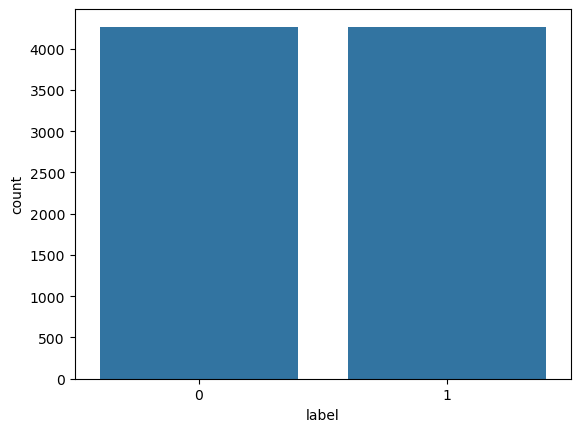

In [12]:
sns.countplot(x=dataset['train']['label'])
plt.xlabel('label');

In [13]:
train_text = dataset['train']['text']
train_labels = dataset['train']['label']

test_text = dataset['test']['text']
test_labels = dataset['test']['label']

In [14]:
count_vect = CountVectorizer()
train_features = count_vect.fit_transform(train_text)
test_features = count_vect.transform(test_text)


# Train the model


In [15]:
model = SGDClassifier(
            loss = config.loss, 
            penalty = config.penalty,
            learning_rate = 'constant', 
            eta0 = config.learning_rate
        ).fit(train_features, train_labels)

# Test the model


In [16]:
test_predicted = model.predict(test_features)
test_proba = model.predict_proba(test_features)
accuracy = metrics.accuracy_score(test_labels, test_predicted)
print(accuracy)

0.7654784240150094


In [17]:
wandb.log({"accuracy": accuracy})
wandb.sklearn.plot_precision_recall(test_labels, test_proba, ["negative", "positive"])



wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.


In [18]:
wandb.finish()

accuracy,▁
accuracy,0.76548


# What to try next

- experiment with different training parameters (iterations, learning rate, regulartization, ...)
- experiment with different training set sizes
- the dataset also has a validation set, what is the accuracy here?
- use Weights & Biases plots to get more insights into the model behavior 
